# Assignment 14 : Random Forest

## Objective : 

Performing the necessary data preprocessing and explortory data analysis , on the given dataset ( Glass.csv) and building a random forest model for the classification and building the models using bagging and boosting and compare the results.

### Data Description : 

**RI** :  refractive index.

**Na** : SOdium ( unit measurement : weight percent in corresonding oxide, as are attributes 4-10)

**Mg** : Magnesium

**Al** : Aluminum

**Si** : Silicon

**K** : Potassium

**Ca** : Calcium

**Ba** : Barium

**Fe** : Iron


**Target Variable (Type of Glass )**

**1** - building_windows_Float_processed 

**2** - building_windows_non_float_processed

**3** - vehicle_windows_float_processed

**4** - Vehicle_winodws_non_float_processed ( none in the database)

**5** - containers

**6** - tableware

**7** - headlamps

## Task 1 : Exploratory Data Analysis (EDA)

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset

data = pd.read_excel("glass.xlsx",sheet_name ="glass")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Hence all the features in the dataset are numeric in nature.

There is no catagorical data in the dataset, the target variable Type is a categorical data , but that is already label_encoded.,

Let's perform the descriptive analysis and finding outliers.

In [6]:
data.isna().sum().sum()

0

In [7]:
# There is no null values.

data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Task 2 : Data Visualization


In [8]:
# Plotting Histogram to each feature and analyse the distribution.

columns = data.columns

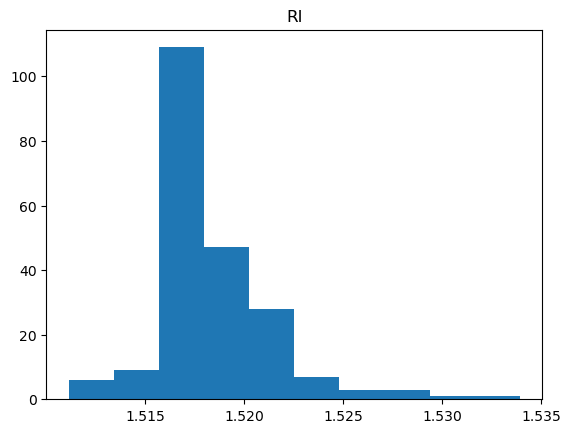

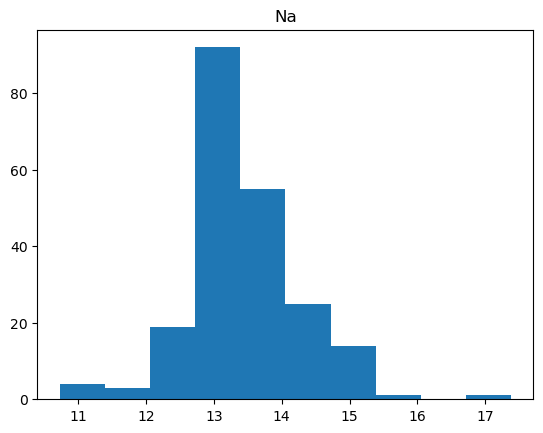

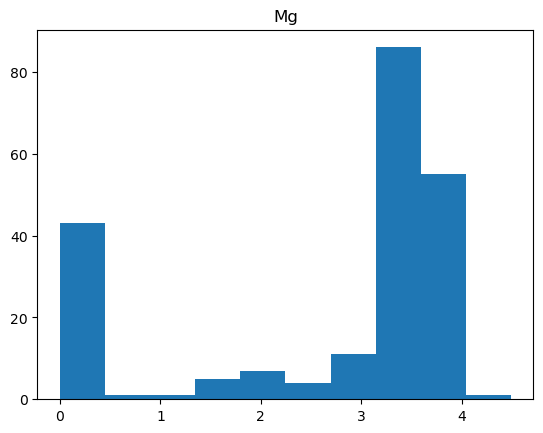

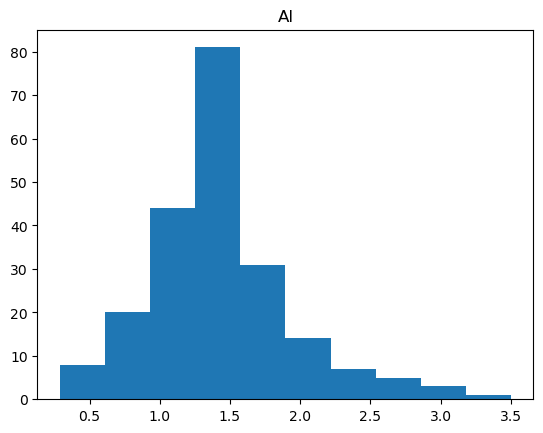

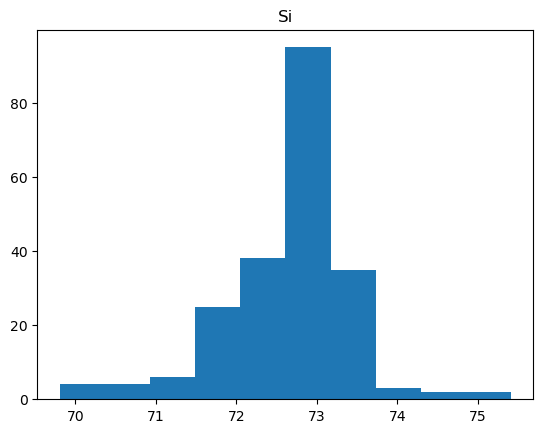

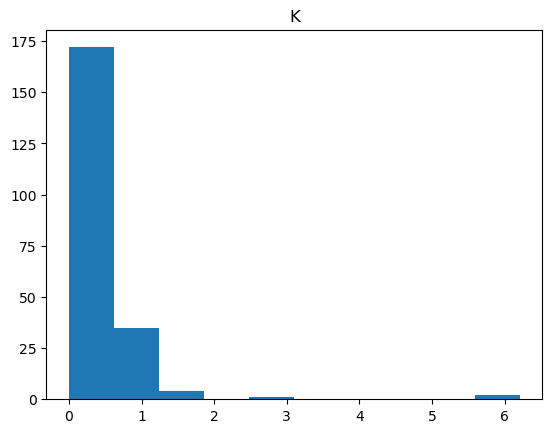

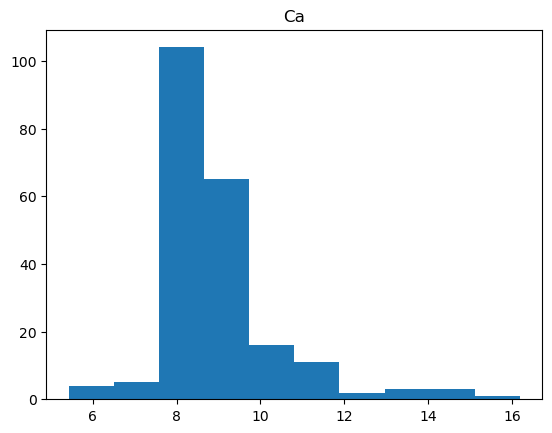

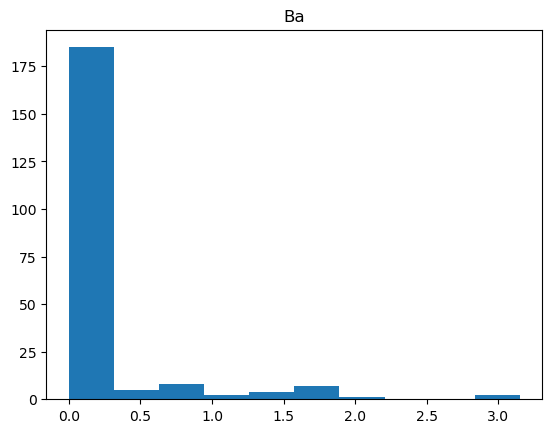

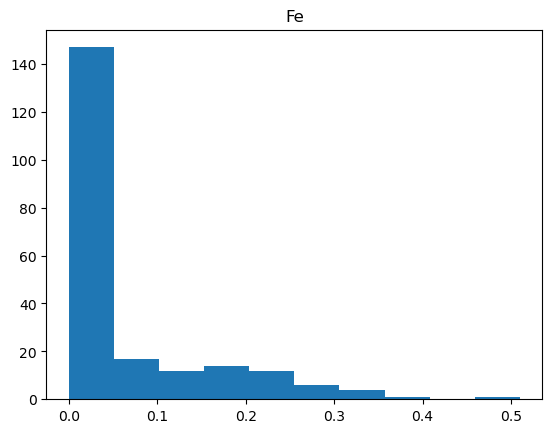

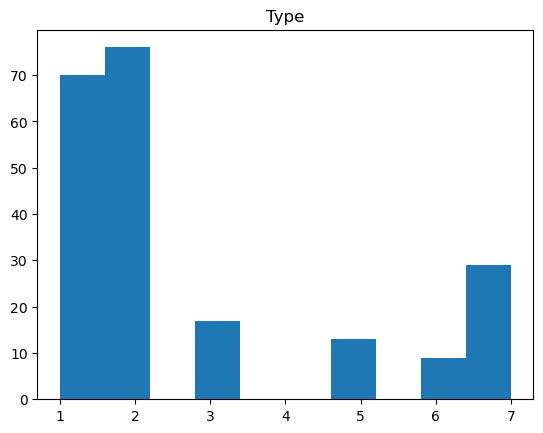

In [10]:
for column in columns:
    plt.hist(data[column])
    plt.title(column)
    plt.show()

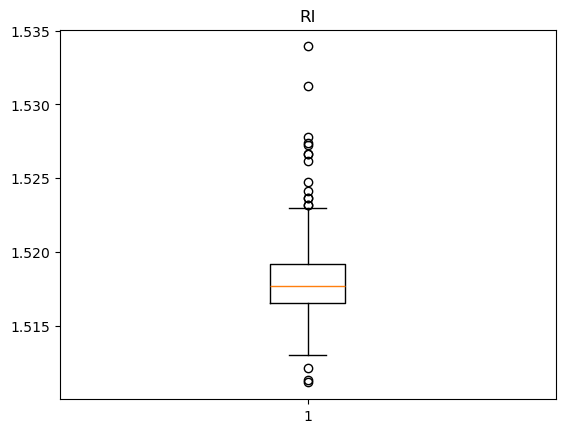

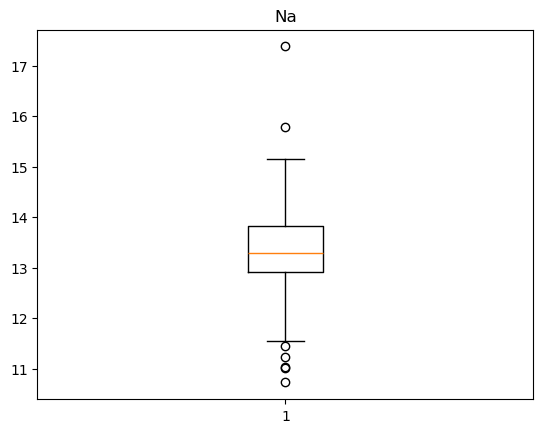

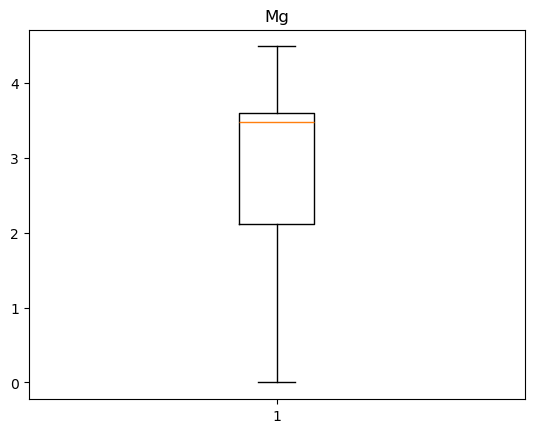

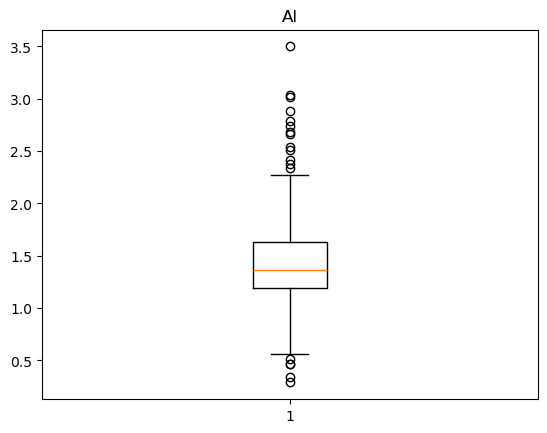

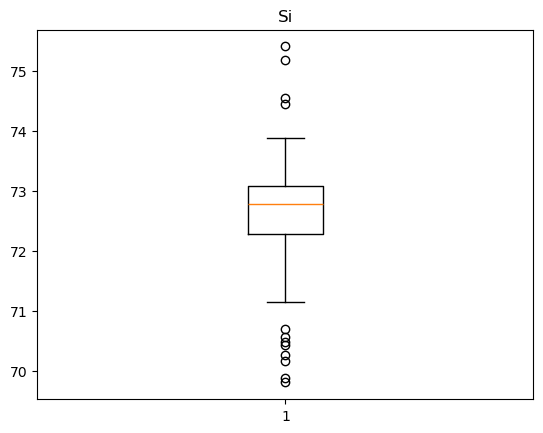

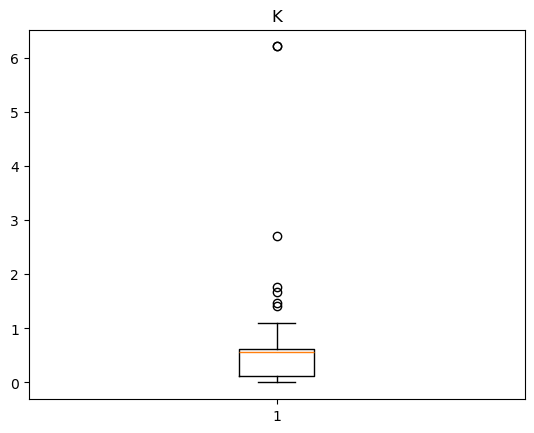

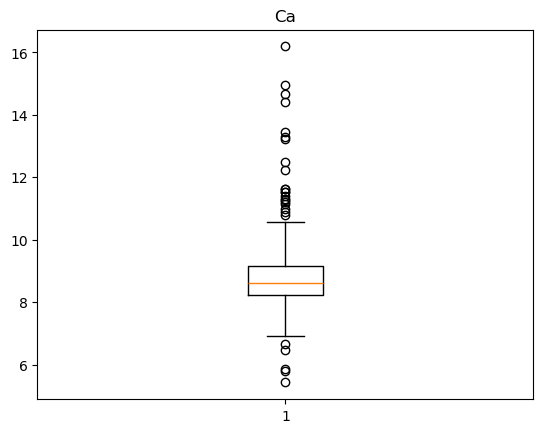

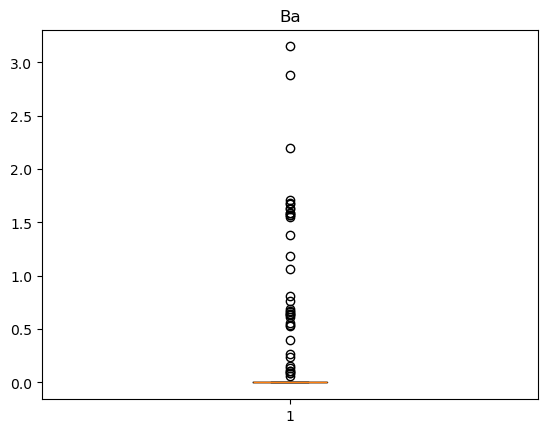

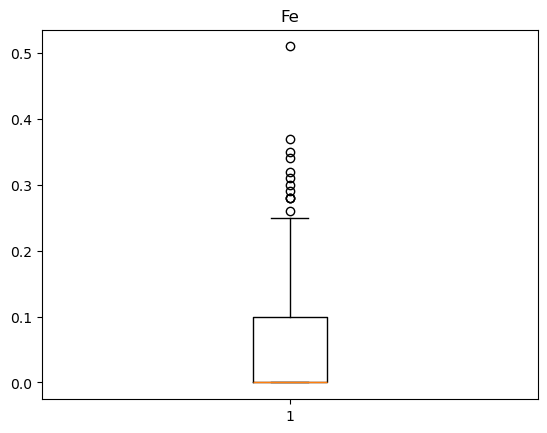

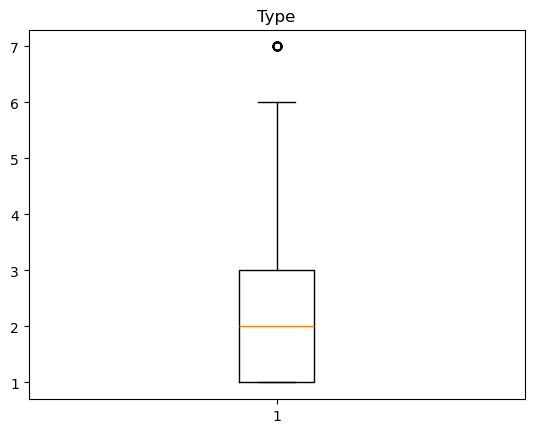

In [12]:
# Plotting BoxPlot to determine outliers.
for column in columns:
    plt.boxplot(data[column])
    plt.title(column)
    plt.show()

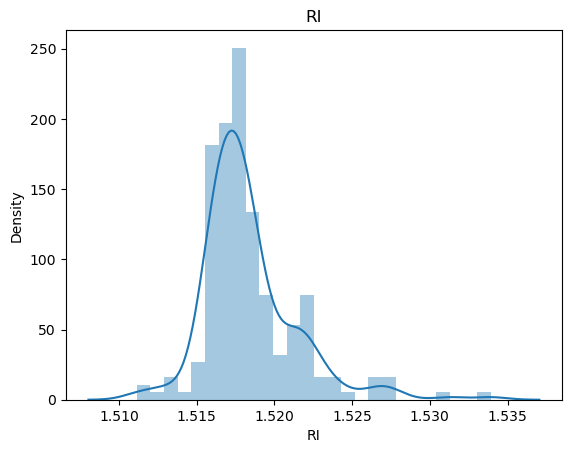

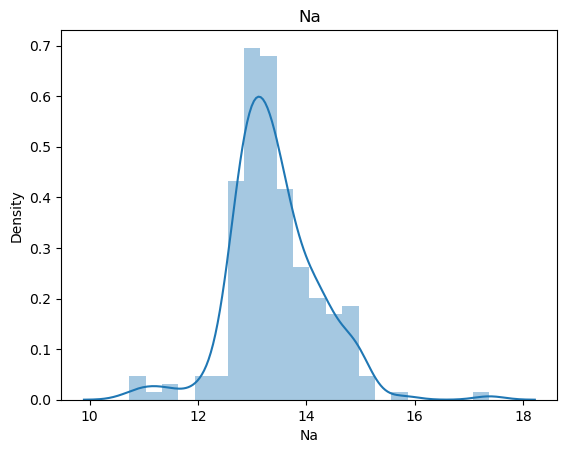

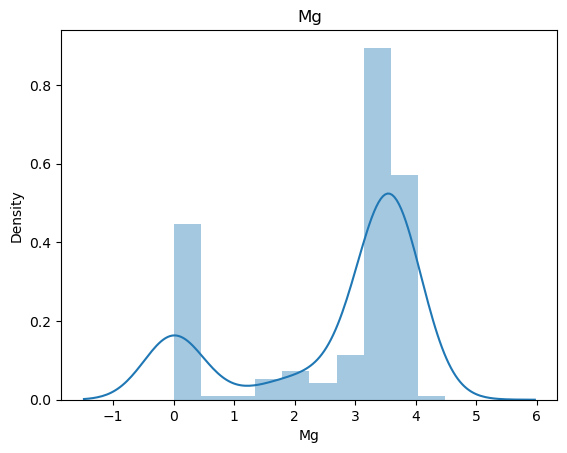

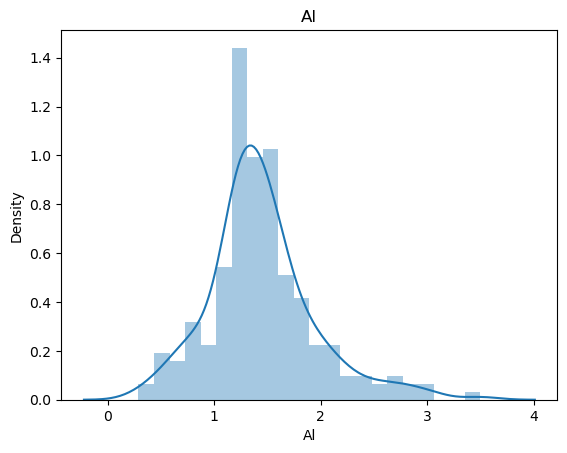

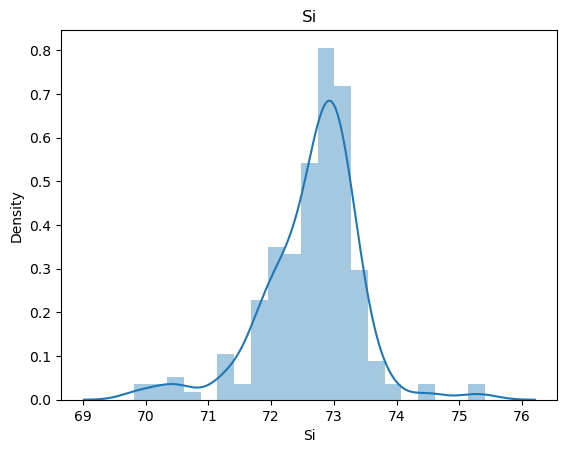

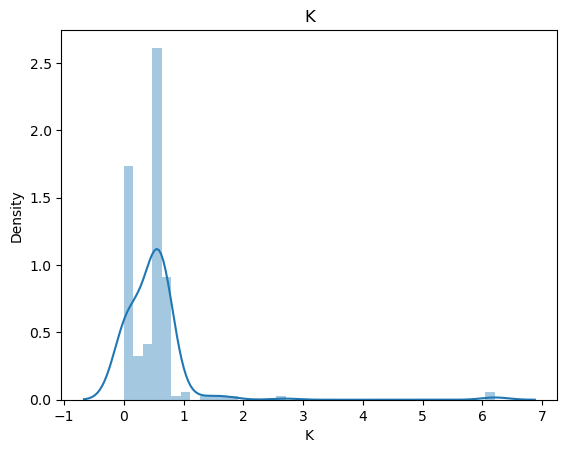

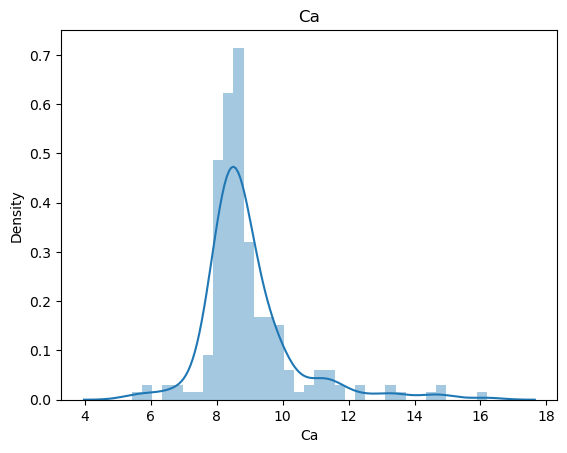

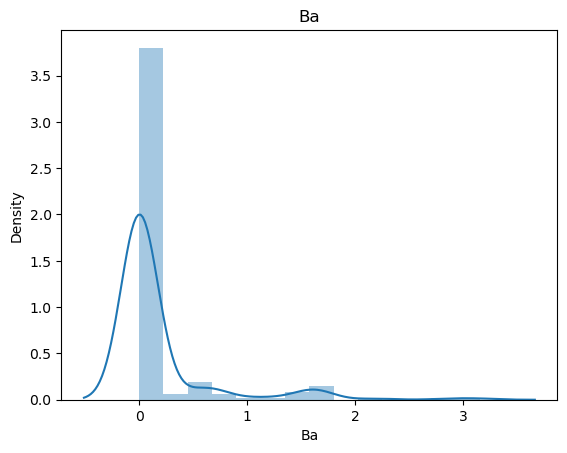

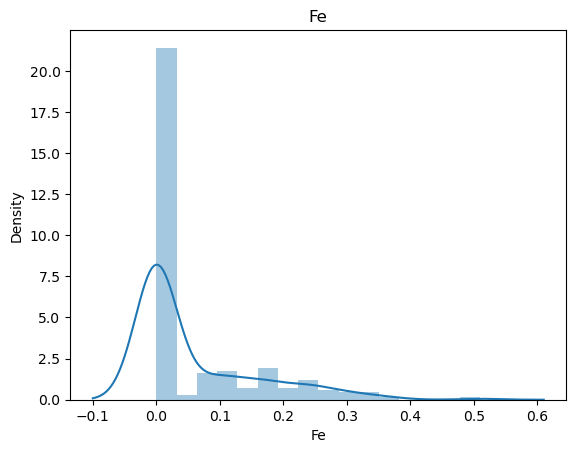

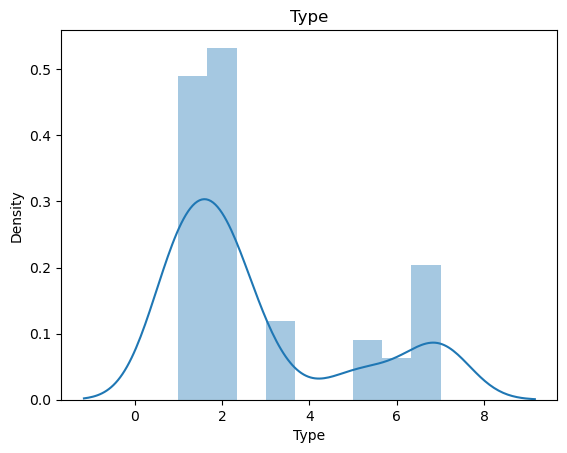

In [18]:
# Plotting dist plot 

for column in columns:
    sns.distplot(data[column])
    plt.title(column)
    plt.show()

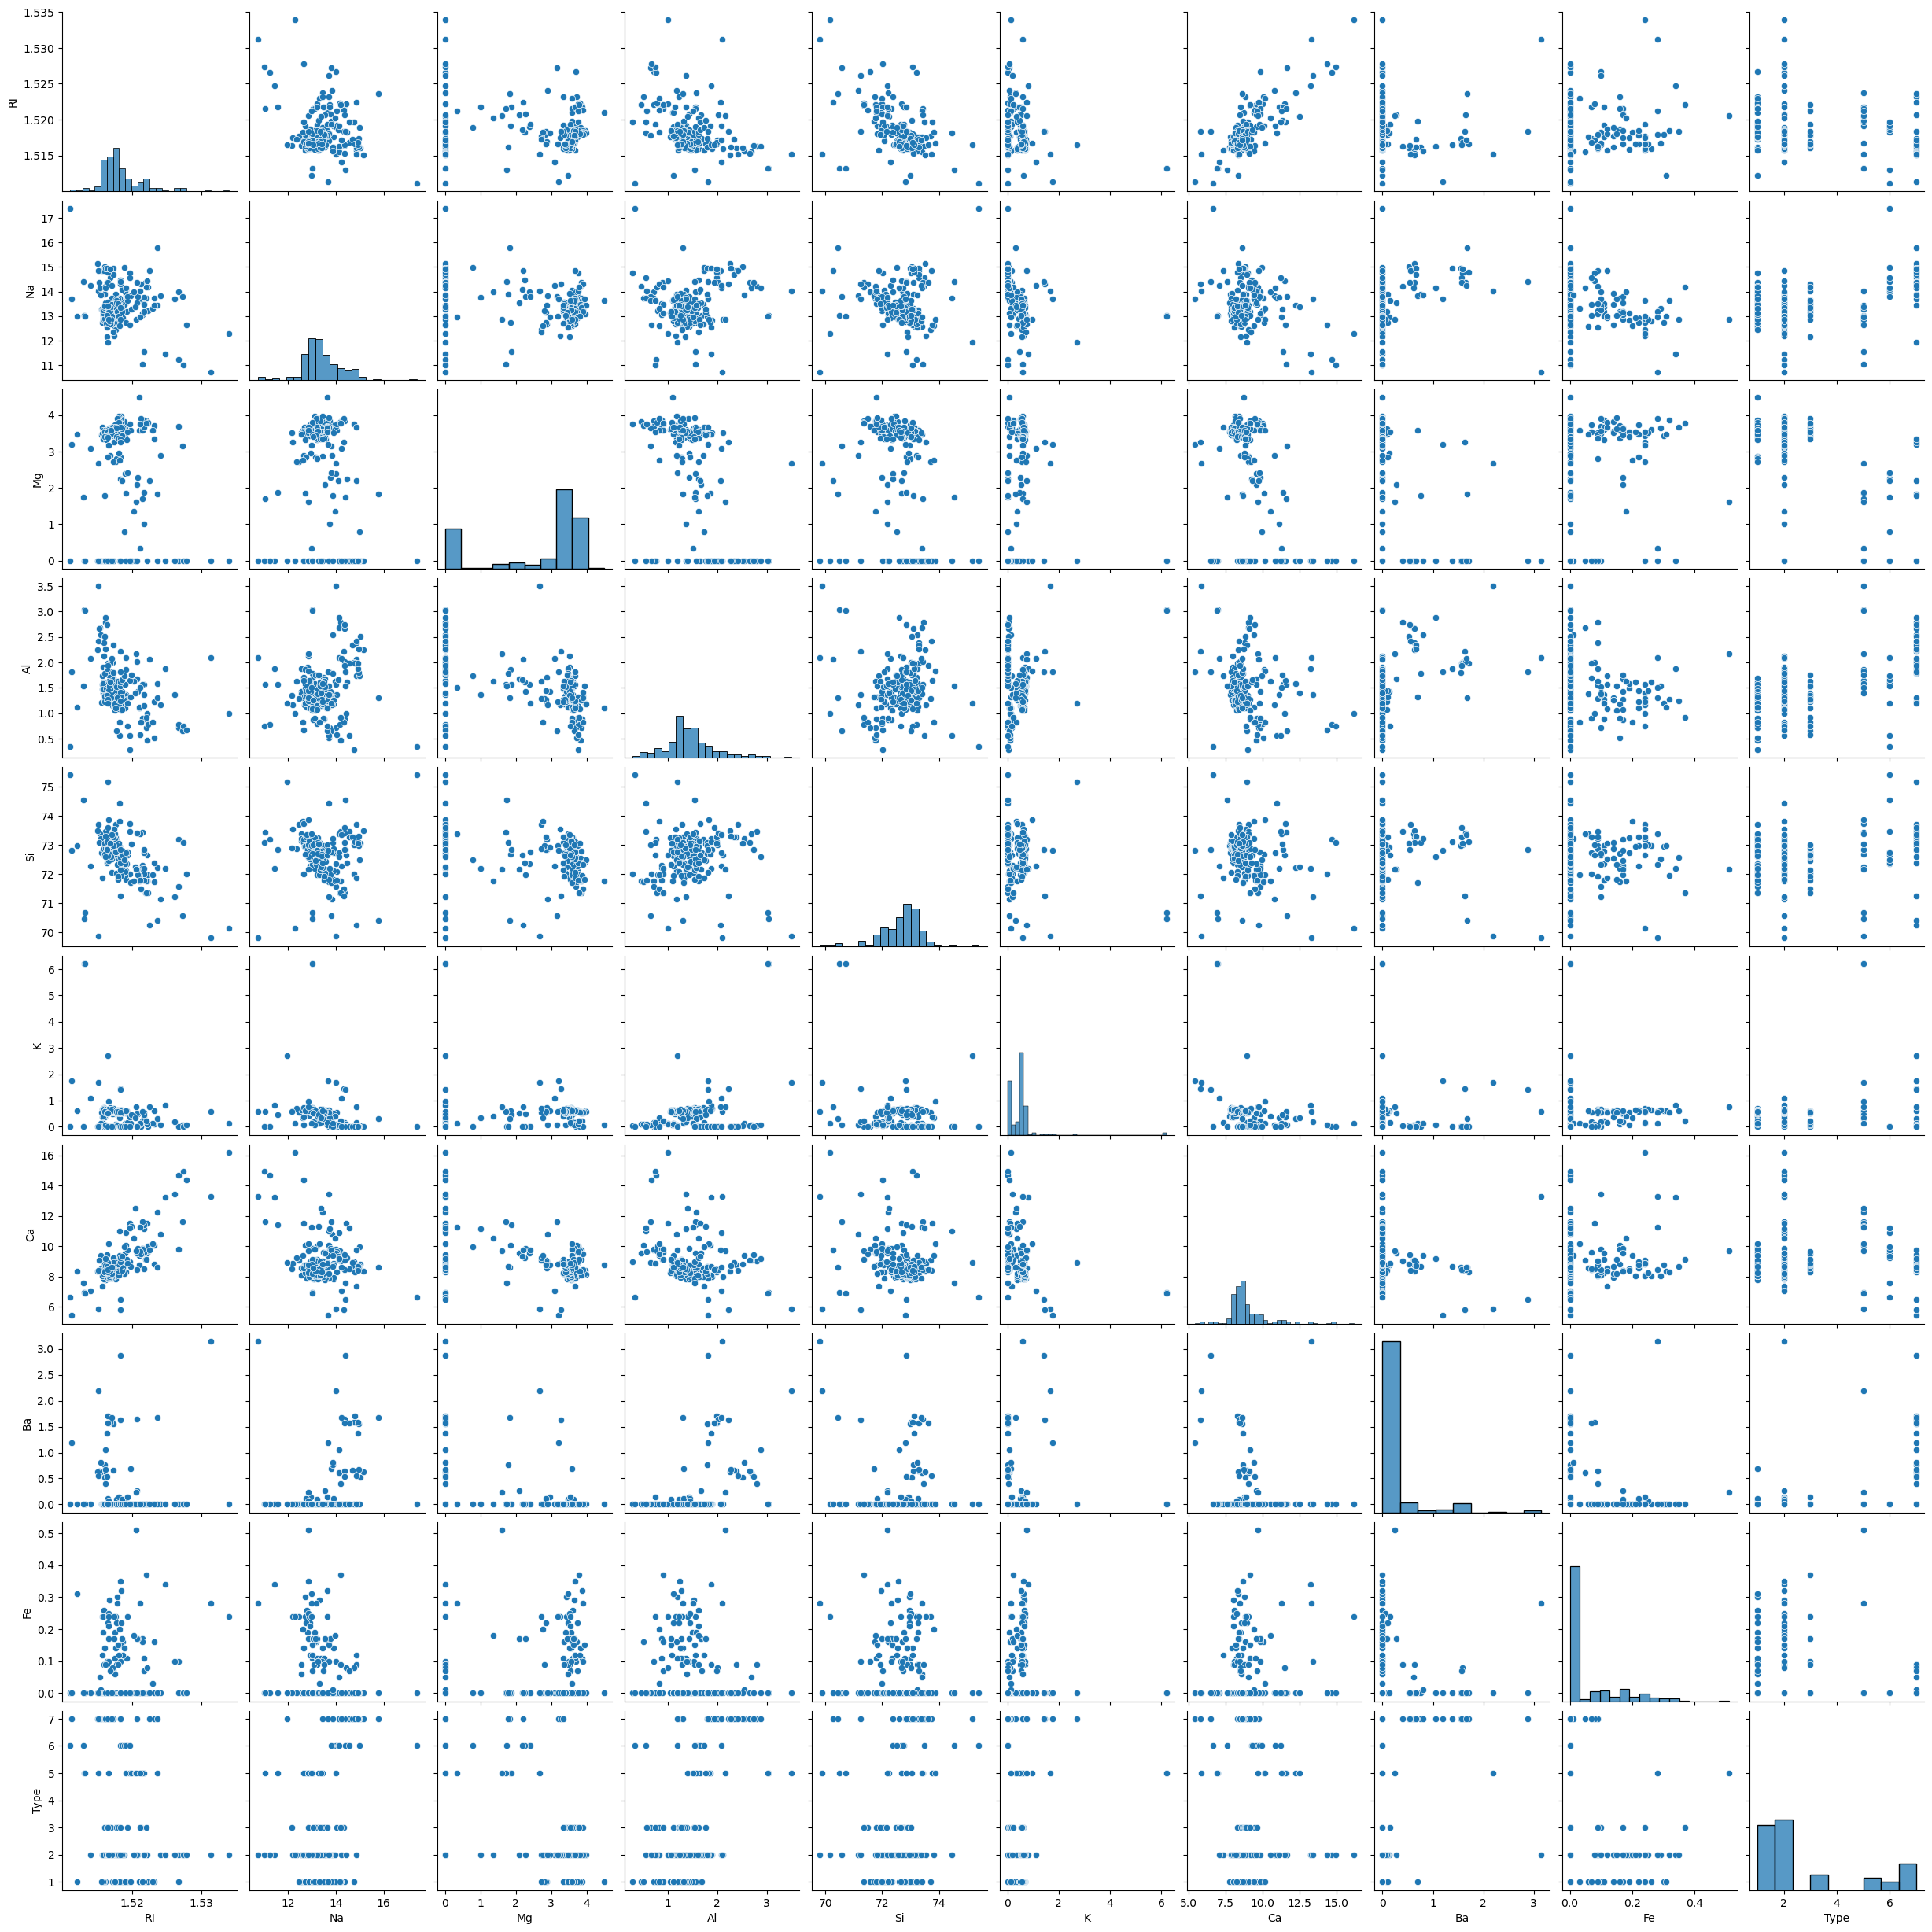

In [19]:
# Pairplot to determine the correlation.

sns.pairplot(data)

In [20]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [21]:
# There is no much relationship to the target variable and ca,ba

## Task 3 : Data Preprocessing

In [22]:
# checking for missing values.

data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [23]:
data.isna().sum().sum()

0

In [24]:
# Transforming the data . using standard scaling method
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data.drop("Type",axis=1))

In [28]:
X_columns = columns.drop("Type")
X_columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [29]:
X = pd.DataFrame(scaled_df,columns=X_columns)

In [30]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [31]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [37]:
Y = data['Type']

## Task 4 : Random Forest Model Implementation

In [42]:
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2,random_state=7)

In [43]:
print("trian_x",train_x.shape)
print("train_y",train_y.shape)
print("test_x",test_x.shape)
print("test_y",test_y.shape)

trian_x (171, 9)
train_y (171,)
test_x (43, 9)
test_y (43,)


In [45]:
# Building Random Forest Model for the classification.
# Random Forest is one of the bagging technique.
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [60]:
num_trees = 100

kfold = KFold()
model = RandomForestClassifier ( n_estimators=num_trees,n_jobs = -1)

In [61]:
model.fit(train_x,train_y)

RandomForestClassifier(n_jobs=-1)

In [62]:
results = cross_val_score(model,train_x,train_y,cv=kfold)

In [63]:
print(results.mean())

0.7946218487394956


In [64]:
from sklearn.metrics import classification_report

In [65]:
y = model.predict(train_x)

In [66]:
print(classification_report(train_y,y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        24

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [67]:
# Finding Accuracy Score
from sklearn.metrics import accuracy_score

In [68]:
accuracy = accuracy_score(train_y,y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [69]:
test_pred = model.predict(test_x)

In [70]:
accuracy - accuracy_score(test_y,test_pred)
print(f"accuracy:{accuracy*100:2f}%")

accuracy:100.000000%


In [71]:
print(classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           1       0.47      0.90      0.62        10
           2       0.93      0.59      0.72        22
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         1
           7       0.83      1.00      0.91         5

    accuracy                           0.70        43
   macro avg       0.62      0.75      0.65        43
weighted avg       0.74      0.70      0.68        43



In [95]:
# Changing the hyper perameters.

model2  = RandomForestClassifier(n_estimators = 50,criterion="gini",max_depth = 5,min_samples_split =3,random_state=7)

In [96]:
model2.fit(train_x,train_y)

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=50,
                       random_state=7)

In [97]:
print(classification_report(train_y,model2.predict(train_x)))

              precision    recall  f1-score   support

           1       0.83      0.97      0.89        60
           2       0.94      0.83      0.88        54
           3       0.91      0.71      0.80        14
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         8
           7       1.00      0.96      0.98        24

    accuracy                           0.91       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.91      0.91      0.91       171



In [98]:
print(classification_report(test_y,model2.predict(test_x)))

              precision    recall  f1-score   support

           1       0.47      0.90      0.62        10
           2       0.87      0.59      0.70        22
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         2
           6       0.50      1.00      0.67         1
           7       0.83      1.00      0.91         5

    accuracy                           0.67        43
   macro avg       0.61      0.67      0.59        43
weighted avg       0.71      0.67      0.66        43



In [99]:
accuracy = accuracy_score(test_y,model2.predict(test_x))

In [122]:
print(accuracy*100)
random_forest_accuracy = np.round(accuracy*100,2)


67.44186046511628
67.44


## Task 5 :Bagging and Boosting Methods



In [108]:
# Implementing Bagging technique to build the model.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

kfold= KFold()
cart = DecisionTreeClassifier(max_depth = 10 , min_samples_split = 3)
num_trees = 300
model4 = BaggingClassifier(estimator = cart, n_estimators = num_trees,random_state=7)

In [109]:
model4.fit(train_x,train_y)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   min_samples_split=3),
                  n_estimators=300, random_state=7)

In [110]:
print(classification_report(test_y,model4.predict(test_x)))

              precision    recall  f1-score   support

           1       0.53      0.90      0.67        10
           2       0.92      0.55      0.69        22
           3       0.00      0.00      0.00         3
           5       0.67      1.00      0.80         2
           6       0.50      1.00      0.67         1
           7       0.83      1.00      0.91         5

    accuracy                           0.67        43
   macro avg       0.58      0.74      0.62        43
weighted avg       0.73      0.67      0.66        43



In [125]:
Bagging_accuracy = np.round(accuracy_score(test_y,model4.predict(test_x))*100,2)
print(Bagging_accuracy)

67.44


In [117]:
# Using Boosting Technique to build the model.
# Using Adaboost 
from sklearn.ensemble import AdaBoostClassifier

kfold = KFold(n_splits = 3, random_state = 7 , shuffle =True)
model5 = AdaBoostClassifier(random_state= 7)

In [118]:
model5.fit(train_x,train_y)

AdaBoostClassifier(random_state=7)

In [119]:
print(classification_report(test_y,model5.predict(test_x)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.57      0.91      0.70        22
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.50      1.00      0.67         1
           7       0.83      1.00      0.91         5

    accuracy                           0.60        43
   macro avg       0.32      0.48      0.38        43
weighted avg       0.40      0.60      0.48        43



In [127]:
Boosting_accuracy = np.round(accuracy_score(test_y,model5.predict(test_x))*100,2)
print(Boosting_accuracy)

60.47


In [130]:
print("Random_forest_Accuracy:",random_forest_accuracy)
print("Bagging_model_Accuracy:",Bagging_accuracy)
print("Boosting_model_Accuracy:",Boosting_accuracy)

Random_forest_Accuracy: 67.44
Bagging_model_Accuracy: 67.44
Boosting_model_Accuracy: 60.47


In [131]:
# By comparing them the random forest and bagging model is giving alomost same accuracy.
# Boosting model is giving less accuracy then the remaining two models.

## 1. Explain Bagging and Boosting methods. How is it different from each other?

### Bagging:

A method where multiple models are trained separately on different random parts of the data.

all models give their predictions , and we combine them like taking a vote to make the final decision.

it helps to make the prediction more stable by reducing errors from individual models.

### Boosting:

A method where models are trained one after each other, with each new model trying to fix the mistakes of the previous one.

The final prediction is made by combining all the models,, with more focus on the difficult parts of the data.

It Helps to make the prediction more accurate by improving the mistakes on step by step.

### Difference :

Bagging trains models idependently and combines their votes, while Boosting trains models in sequence to correct the mistakes, bagging makes predictions more stable, and Boosting makes them more accurate.

## 2. Explain How to handle imbalance in the data?

### Resampling technique :

Oversampling : Increase the number of minority class samples.

UnderSampling : Reduce the number of majority class samples.

### Class weight Adjustment:

Assign higher weights to the minority class to make the model pay more attention  to it.

### Use Different Metrics :
 use metrics like F1-scroe ,confusion matrix,  AUC_ROC ,precision-recall for evaluating the model

### Enesmble methods:

use techniques like random forest or boosting with class balancing to imporove performance on imblanced data.